In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

In [2]:
mn_snapshot = pd.read_csv("./result.csv",
                    header=None,              
                    names=['payee', 'mn_count', 'power']
                  )

In [3]:
# set approriate datatypes
mn_snapshot = mn_snapshot.fillna(method='ffill').dropna()
mn_snapshot['mn_count'] = pd.to_numeric(mn_snapshot['mn_count'], errors='coerce', downcast='integer')
mn_snapshot['power'] = pd.to_numeric(mn_snapshot['power'], errors='coerce', downcast='integer')

In [4]:
# fetch top 100 payees (addresses that control the most masternodes)
Masternode_Analysis = mn_snapshot.head(100).sort_values(by='mn_count', ascending=True).dropna()

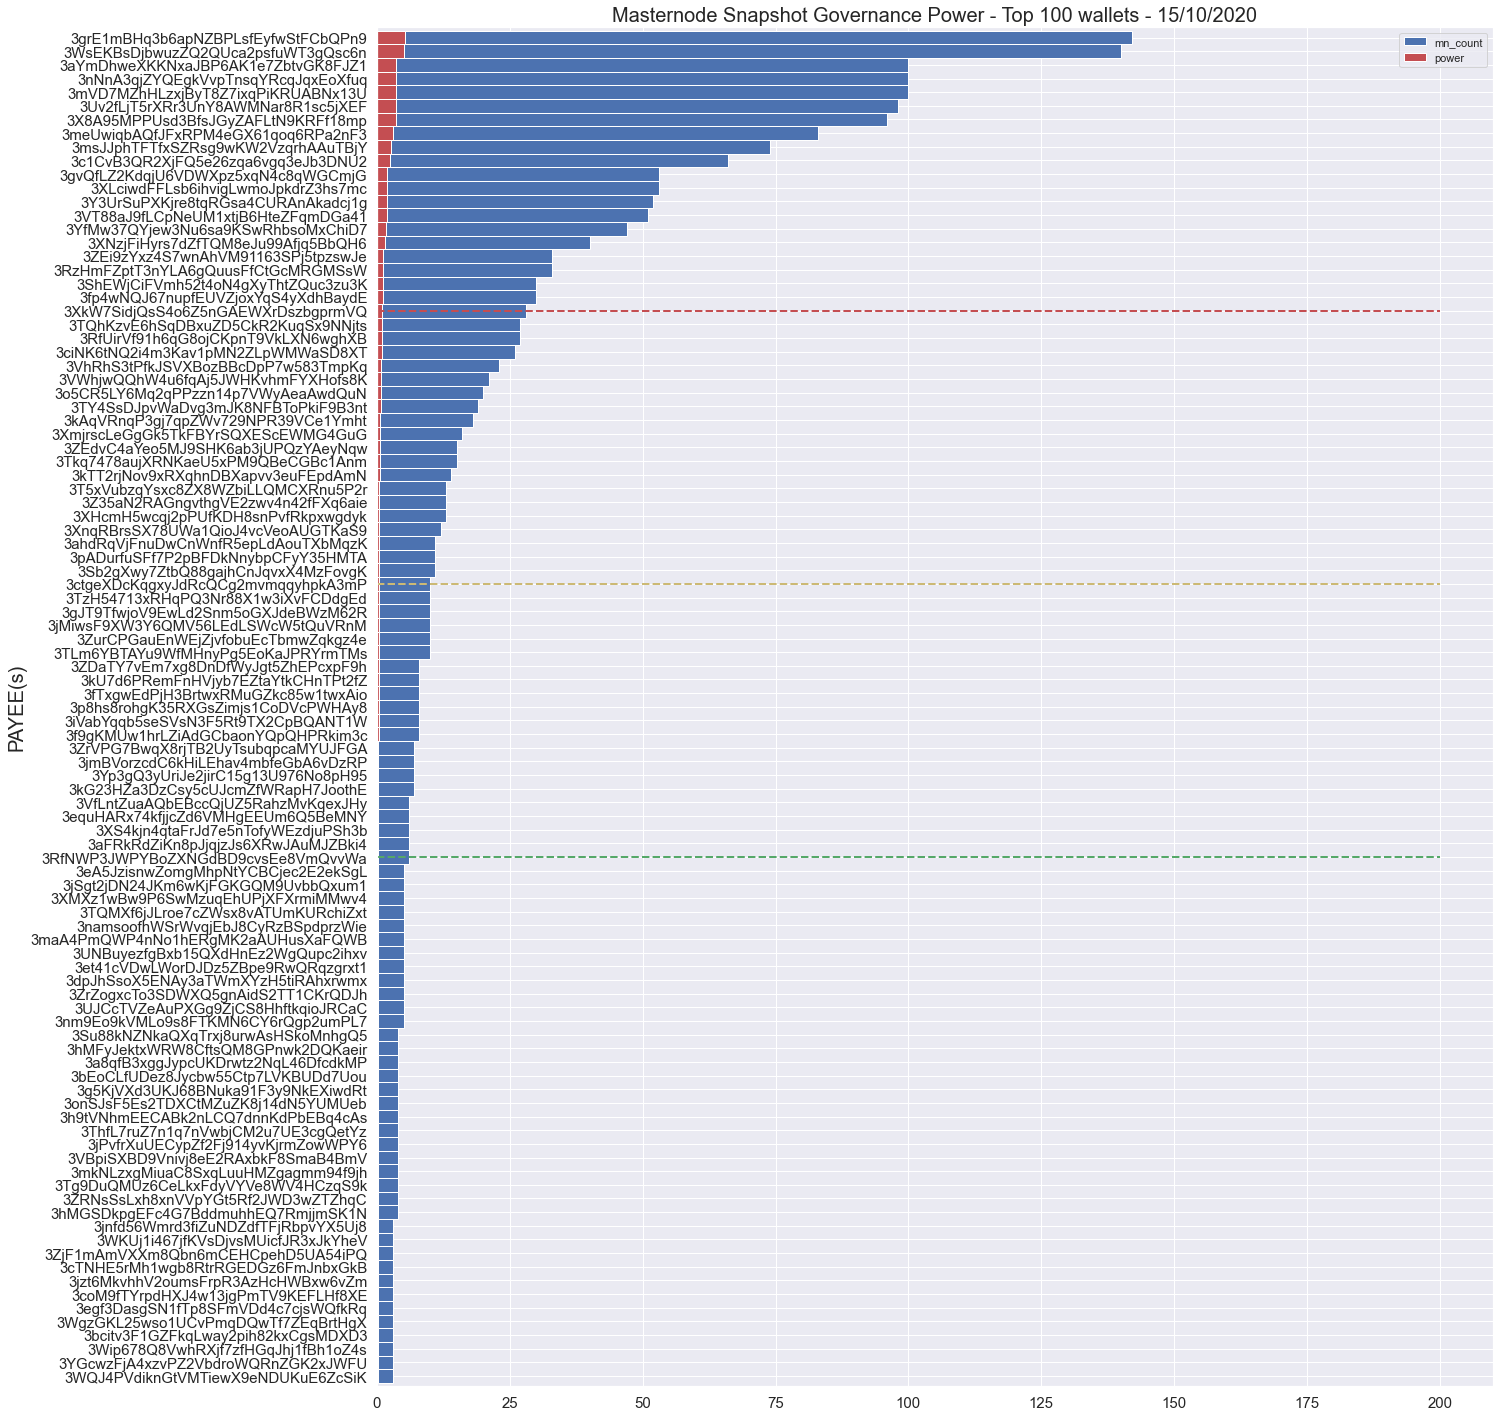

In [5]:
ax = Masternode_Analysis.plot(figsize=[20, 25], x='payee', y='mn_count', kind='barh', width=1, fontsize=15)
ax.hlines(78, xmin=0, xmax=200, colors='r', lw=2, linestyle="--")
ax.hlines(58, xmin=0, xmax=200, colors='y', lw=2, linestyle="--")
ax.hlines(38, xmin=0, xmax=200, colors='g', lw=2, linestyle="--")
MA_BARH = Masternode_Analysis.plot(x='payee', y='power', ax=ax, kind='barh', width=1, color='C3')
MA_BARH.legend(bbox_to_anchor=(1, 1))
MA_BARH.set_title('Masternode Snapshot Governance Power - Top 100 wallets - 15/10/2020', fontsize=20)
MA_BARH.set_ylabel('PAYEE(s)', fontsize=20);

plt.show()